In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy as np

In [15]:
S1 = (0,0)
S2 = (9.2, 0)
v1, v3 = 5.6, 8.4

C_v = []

for x in np.arange(0,9.2,0.25):
    for y in np.arange(0.0,15.0,0.25):
        C_v.append((x,y))

In [16]:
def calc_v2(S, C):
    return math.sqrt( (C[0]-S[0])**2 + (C[1]-S[1])**2 )

def alpha(S, C, v1, v3):
    v2 = calc_v2(S, C)
    try:
        epsilon_1 = math.acos( (v1**2 + v2**2 - v3**2) / (2*v1*v2) )
        epsilon_2 = math.atan2( (C[1]-S[1]) , (C[0]-S[0]) )
    except (ValueError, ZeroDivisionError):
        return None
    
    candidate_one = epsilon_1 + epsilon_2
    candidate_two = - epsilon_1 + epsilon_2
    
    return [candidate_one, candidate_two]
    #return list(map(lambda v: v*180/math.pi, (candidate_one, candidate_two)))

alpha1_v = [alpha(S1, c, v1, v3) for c in C_v]
alpha2_v = [alpha(S2, c, v1, v3) for c in C_v]

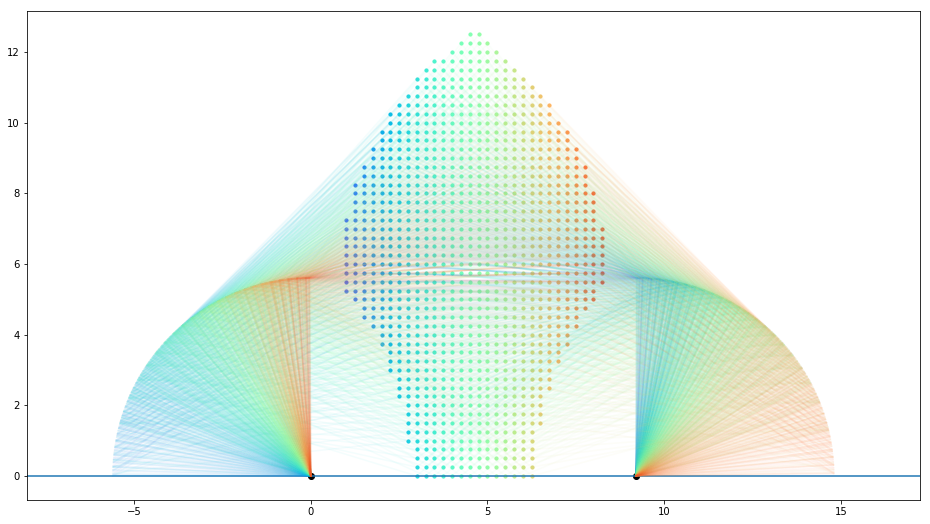

In [17]:
from matplotlib.pyplot import cm
colors = iter(cm.rainbow(np.linspace(0, 1, len(alpha1_v))))
alph = 0.05
plt.figure(figsize=(16,9))
plt.axis('equal')

# Plot servos and horizontal line
plt.scatter(S1[0], S1[1], c="black")
plt.scatter(S2[0], S2[1], c="black")
plt.axhline(0)

# For each point and its calculated angles...
for pairs in zip(C_v, alpha1_v, alpha2_v, colors):
    
    # If we have valid angles and these are within the right ranges...
    if pairs[1] is not None and pairs[2] is not None and \
        ((math.pi/2 <= pairs[1][0] <= math.pi) or (math.pi/2 <= pairs[1][1] <= math.pi)) and \
        ((0 <= pairs[2][0] < math.pi/2) or (0 < pairs[2][1] <= math.pi/2)):
        
        # Plot the point
        plt.scatter(pairs[0][0], pairs[0][1], c=pairs[3], s=10)
        
        # Plot zero, one, or two lines to it from S1, depending on validity of those paths
        for candidate in pairs[1]:
            if (math.pi/2 <= candidate < math.pi):
                x = math.cos(candidate)
                y = math.sin(candidate)
                plt.plot((S1[0], x*v1), (S1[1], y*v1), c=pairs[3], alpha=alph)
                plt.plot((x*v1, pairs[0][0]), (y*v1, pairs[0][1]), c=pairs[3], alpha=alph)
        
        # Plot zero, one, or two lines to it from S2, depending on validity of those paths
        for candidate in pairs[2]:
            if (0 < candidate <= math.pi/2):
                x = math.cos(candidate)
                y = math.sin(candidate)
                plt.plot((S2[0], S2[0]+x*v1), (S2[1], S2[1]+y*v1), c=pairs[3], alpha=alph)
                plt.plot((S2[0]+x*v1, pairs[0][0]), (S2[1]+y*v1, pairs[0][1]), c=pairs[3], alpha=alph)